## Read Dataset

In [1]:
import pandas as pd
df = pd.read_csv("data/Assignment-2_Data.csv")

In [2]:
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


`Id` field is not relevant, so we can remove it

In [3]:
df.drop(columns=['Id'], inplace=True)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Handle `age`

`-1` and `999.0` are the anomalies in this dataset, so let's remove it

In [11]:
df[(df['age'] == 999) | (df['age'] == -1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
45203,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [13]:
df[(df['age'] == 999) | (df['age'] == -1)].index

Index([0, 45203, 45204, 45205], dtype='int64')

In [16]:
df.drop(df[(df['age'] == 999) | (df['age'] == -1)].index, inplace=True)

In [17]:
df.age.describe()

count    45198.000000
mean        40.936302
std         10.617847
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

## Handle Null values

In [18]:
df.isnull().sum()

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

`age` and `balance` features having null values `9` and `3` respectively, so let's remove null values

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Let's find out `age` distribution

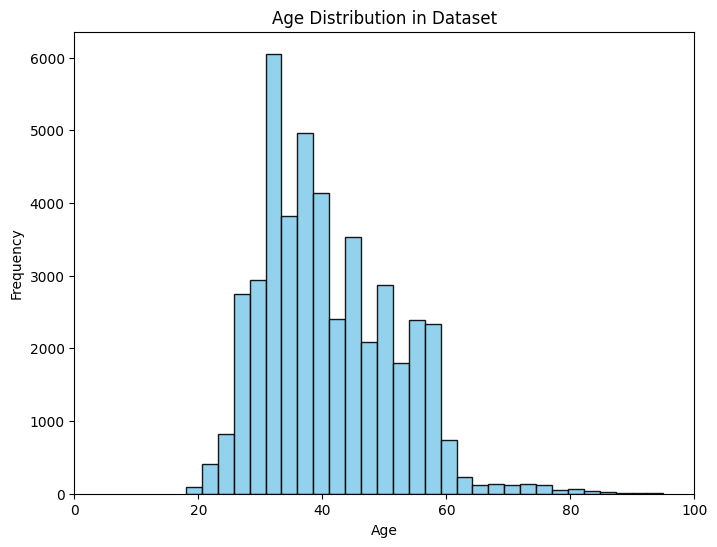

count    45196.000000
mean        40.935879
std         10.617774
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df['age'], bins=30, edgecolor='k', alpha=0.9, color='skyblue')
plt.xlim(0, 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Dataset')
plt.show()

df['age'].describe()

Most person `age` is between `25` and `57`

## Let's Analyse `job`

In [30]:
df['job'].value_counts()

job
blue-collar      9730
management       9456
technician       7594
admin.           5169
services         4153
retired          2262
self-employed    1579
entrepreneur     1485
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: count, dtype: int64

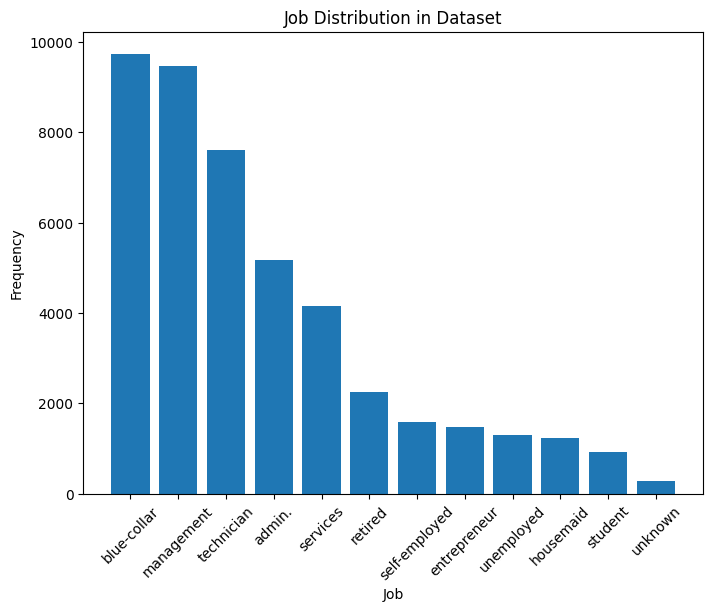

job
blue-collar      9730
management       9456
technician       7594
admin.           5169
services         4153
retired          2262
self-employed    1579
entrepreneur     1485
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: count, dtype: int64

In [39]:
category_counts = df['job'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(category_counts.index, category_counts.values)

plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Job Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()

df['job'].describe()
df['job'].value_counts()

## Let's analyse `marital`

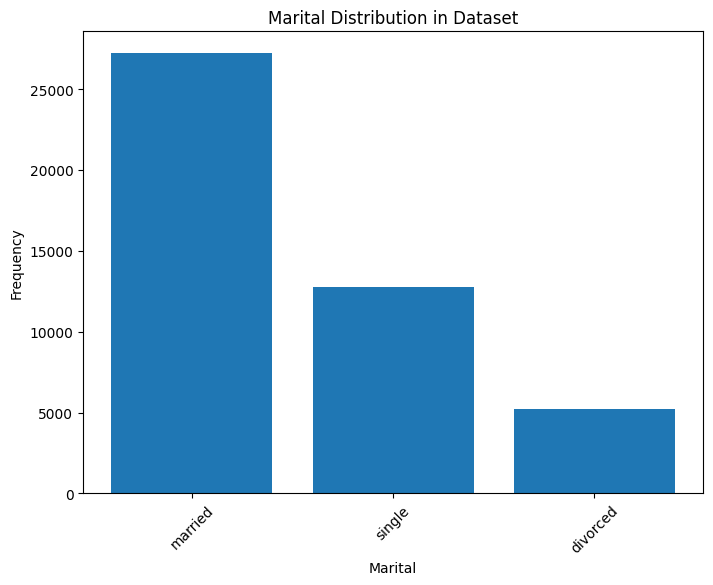

marital
married     27208
single      12782
divorced     5206
Name: count, dtype: int64

In [38]:
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(marital_counts.index, marital_counts.values)

plt.xlabel('Marital')
plt.ylabel('Frequency')
plt.title('Marital Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()

df['marital'].value_counts()

## Let's analyse `education`

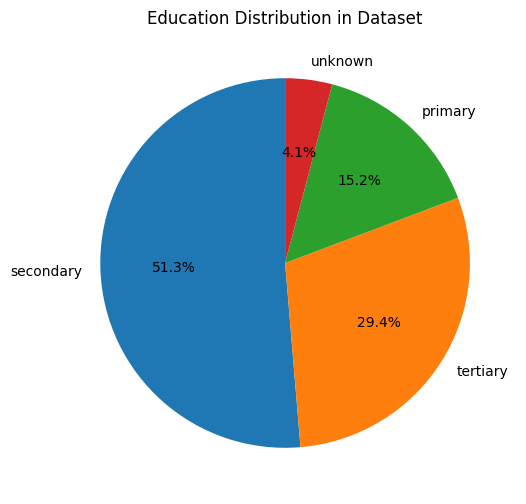

education
secondary    23197
tertiary     13295
primary       6849
unknown       1855
Name: count, dtype: int64

In [54]:
feature = 'education'
education_counts = df[feature].value_counts()
plt.figure(figsize=(8,6))
plt.pie(education_counts, labels=education_counts.index, startangle=90, autopct='%1.1f%%',)

plt.title('Education Distribution in Dataset')
plt.show()

df[feature].value_counts()


## Let's analyze `default`

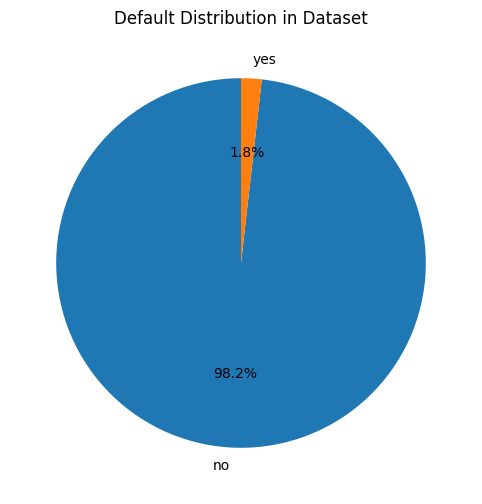

default
no     44382
yes      814
Name: count, dtype: int64

In [57]:
feature = 'default'
feature_counts = df[feature].value_counts()
plt.figure(figsize=(8,6))
plt.pie(feature_counts, labels=feature_counts.index, startangle=90, autopct='%1.1f%%',)

plt.title('Default Distribution in Dataset')
plt.show()

df[feature].value_counts()

## Let's analyse the relationship between `age` and `balance`

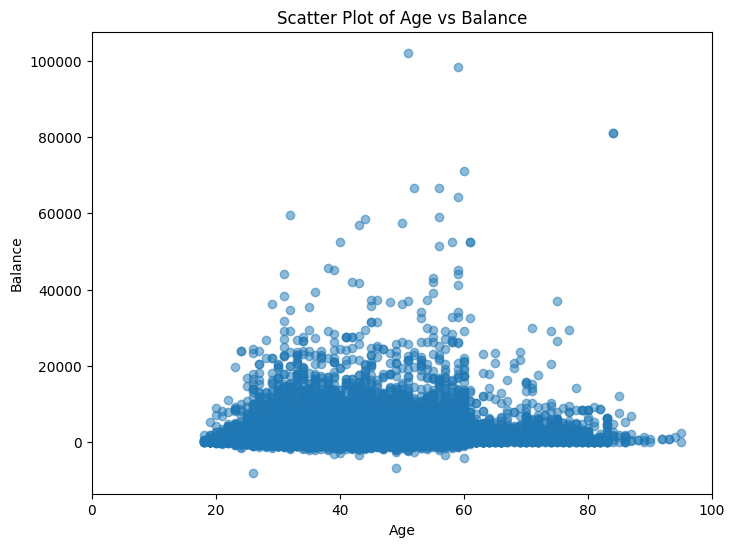

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['balance'], alpha=0.5)
plt.xlim(0, 100)
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

The person having `age` is between `50` and `60` having maximum `balance`

## Let's analyse the relationship between `age` and `loan`

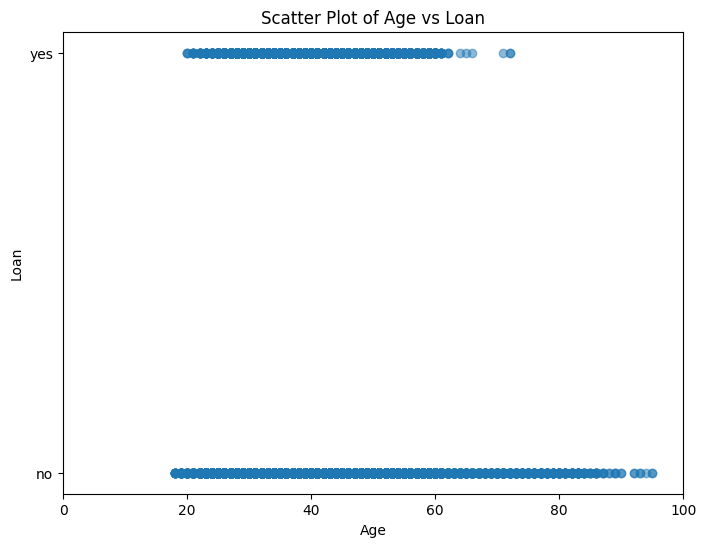

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter( df['age'], df['loan'], alpha=0.5)
plt.xlim(0, 100)
plt.title('Scatter Plot of Age vs Loan')
plt.xlabel('Age')
plt.ylabel('Loan')
plt.show()

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no


## Understand dataset

In [76]:
df.y.value_counts()

y
no     39911
yes     5289
Name: count, dtype: int64

From the above analysis, we found `39911` people not subscribe or only `5289` people subscribe. So our dataset is `highly unbalanced`.

## Numerical and Categorical Columns

In [77]:
target = 'y'
numerical_col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [78]:
df[numerical_col]

,age,balance,day,duration,campaign,pdays,previous
0,999.0,2143.0,5,261,1,-1,0
1,44.0,29.0,5,151,1,-1,0
2,33.0,2.0,5,76,1,-1,0
3,47.0,1506.0,5,92,1,-1,0
4,33.0,1.0,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51.0,825.0,17,977,3,-1,0
45207,71.0,1729.0,17,456,2,-1,0
45208,72.0,5715.0,17,1127,5,184,3
45209,57.0,668.0,17,508,4,-1,0


In [79]:
df[categorical_col]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


## Feature Importance
### Categorical Variable through `Mutual Information`

In [83]:
from sklearn.metrics import mutual_info_score
scores = []
for col in categorical_col:
    score = mutual_info_score(df[target], df[col])
    scores.append(round(score, 4))
    print(col, round(score, 4))

job 0.0083
marital 0.0021
education 0.0026
default 0.0003
housing 0.0096
loan 0.0026
contact 0.0136
month 0.0243
poutcome 0.0294


In [84]:
scores

[0.0083, 0.0021, 0.0026, 0.0003, 0.0096, 0.0026, 0.0136, 0.0243, 0.0294]

In [85]:
list(zip(categorical_col, scores))

[('job', 0.0083),
 ('marital', 0.0021),
 ('education', 0.0026),
 ('default', 0.0003),
 ('housing', 0.0096),
 ('loan', 0.0026),
 ('contact', 0.0136),
 ('month', 0.0243),
 ('poutcome', 0.0294)]

In [86]:
import numpy as np
cat_data = np.array(list(zip(categorical_col, scores)), dtype=[('category', 'U10'), ('value', float)])

# Sort the NumPy array by the 'value' field
sorted_data = np.sort(cat_data, order='value')

# Convert the sorted NumPy array back to a list of tuples (optional)
sorted_list = sorted_data.tolist()

sorted_list

[('default', 0.0003),
 ('marital', 0.0021),
 ('education', 0.0026),
 ('loan', 0.0026),
 ('job', 0.0083),
 ('housing', 0.0096),
 ('contact', 0.0136),
 ('month', 0.0243),
 ('poutcome', 0.0294)]

## Feature Importance of `Numerical col`

In [89]:
df[target] = df[target].replace({'yes': 1, 'no': 0})

In [90]:
numerical_col + [target]

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

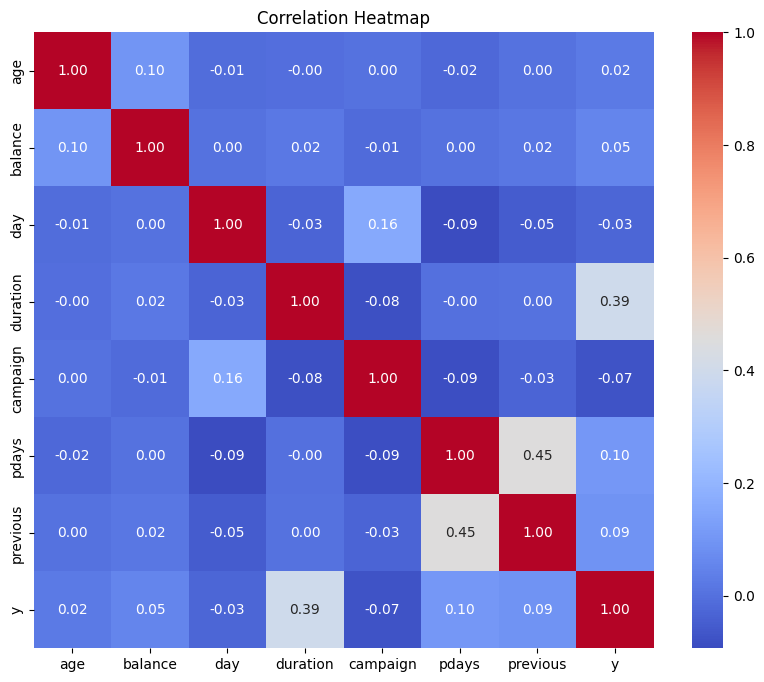

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[numerical_col + [target]].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()